In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import string
path ='/content/drive/MyDrive/ml_project/' 
# stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#Dataset Preparation

In [55]:
data = pd.read_excel(path+'lan1000.xlsx')
print("Total Contents:",len(data),
      "\nTotal chittagong Contents:",len(data[data.Category =='chittagonian']),
      "\nTotal chakma Contents:",len(data[data.Category=='chakma']),
      "\nTotal sylheti Contents:",len(data[data.Category=='sylheti']),
      "\nTotal Bangla Contents:",len(data[data.Category=='bangla']))

Total Contents: 1000 
Total chittagong Contents: 250 
Total chakma Contents: 250 
Total sylheti Contents: 250 
Total Bangla Contents: 250


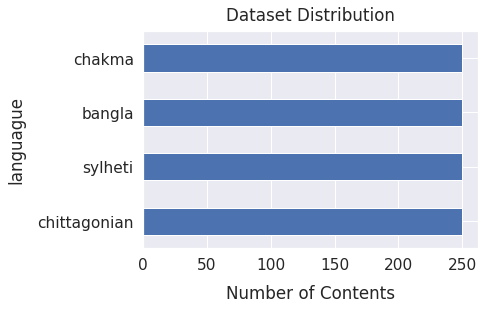

In [56]:
sns.set(font_scale=1.4)
data['Category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Contents", labelpad=12)
plt.ylabel("languague", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [57]:
# print some unprocessed reviews
sample_data = [10,100,150]
for i in sample_data:
      print(data.Content[i],'\n','Language:-- ',data.Category[i],'\n')  

বন্ধু যারগুই হাসিখুশি লই জাইউমগুই গারিত তুলি বন্ধু যারগুই হাসিখুশি লই জাইউমগুই গারিত তুলি নিউ মারকেটত লই যাই তুয়ারে কিনি দিউম লাল শাড়ী ও কালাচান গলার মালা পেট পুরেদ্দে তুয়ারলাই পেট পুরেদ্দে তুয়ারলাই কইলজা জ্জলের তুয়ারলাই ও কালাচান গলার মালা পেট পুরেদ্দে তুয়ারলাই 
ও কালাচান গলার মালা পেট পুরেদ্দে তুয়ারলাই ও কালাচান গলার মালা পেট পুরেদ্দে তুয়ারলাই 
 Language:--  chittagonian 

সিটেইঙ্গে ফোয়াঅল নিজে হাদি বিয়ের হতা হইলি বেয়াকে এইল্লে হ দে। আক্কুম বাক্কুম কিয়াঁরামুইশে ৱাইঙ্গে টিঁয়ারা,মুইশ মাইত্তো গিলাম দে,কেডা ফ়ুডি মইল্যাম দে,ৱাবিরে ৱাবি সুলত দ়র,সুলত কা লও, বরো ৱাইয়োর বউ,বরো ৱাই বরো ৱাই হদম তলে,স়ুডু ৱাই স়ুডু ৱাই তেতঁই তলে,লাম্বা জ়িঅর লাম্বা সুল,বিনিত্ বাইন্দে সাম্বা ফ়ুল,সাম্বা ফ়ুলর ত৴লে, দোআ মানিক জ৴লে,দোআ মানিক সাইতে গিলে আ়ফে সত্তর দ়রে,আ়ফে সত্তর দ়রে, আ়ফে সত্তর দ়রে। 
 Language:--  chittagonian 

কেনে সম্ভব অইলু, হন চাই? ও মামুরে হেডমাস্টরে তুঁয়ারে তুয়ার। মারেম্মা তেলর বাজারত তো আগুন লাগি গেইয়ি।  
 Language:--  chittagonian 



#Data Cleaning

In [58]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row):
      Content = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      return Content
# Apply the function into the dataframe
data['cleaned'] = data['Content'].apply(cleaning_data)  

# print some cleaned contents from the dataset
sample_data = [20,50,100,200,700]
for i in sample_data:
  print('Original: ',data.Content[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:--> ',data.Category[i],'\n')

Original:  বর্মার মাইয়া কি গরিবো আঁই যদি ঠিক থাকি? সোনার যৈবন খদিন রাইক্কুম গামছা দি বান্দি এন না 
Cleaned: বর্মার মাইয়া কি গরিবো আঁই যদি ঠিক থাকি  সোনার যৈবন খদিন রাইক্কুম গামছা দি বান্দি এন না 
 Category:-->  chittagonian 

Original:  টিউশুনিত উদো টিয়া নয়, টিয়াত্তুন বেশি কিছু আছে। যেন ধরন বিসিএসর প্রস্তুতির ওজ্ঞো বর সুযোগ। টিয়াত আছেই।এগিন চিন্তা গরি আর ওয়াইরগা রাজিব্বার হতাত রাজি অই গেলাম।  
Cleaned: টিউশুনিত উদো টিয়া নয়  টিয়াত্তুন বেশি কিছু আছে  যেন ধরন বিসিএসর প্রস্তুতির ওজ্ঞো বর সুযোগ  টিয়াত আছেই এগিন চিন্তা গরি আর ওয়াইরগা রাজিব্বার হতাত রাজি অই গেলাম   
 Category:-->  chittagonian 

Original:  সিটেইঙ্গে ফোয়াঅল নিজে হাদি বিয়ের হতা হইলি বেয়াকে এইল্লে হ দে। আক্কুম বাক্কুম কিয়াঁরামুইশে ৱাইঙ্গে টিঁয়ারা,মুইশ মাইত্তো গিলাম দে,কেডা ফ়ুডি মইল্যাম দে,ৱাবিরে ৱাবি সুলত দ়র,সুলত কা লও, বরো ৱাইয়োর বউ,বরো ৱাই বরো ৱাই হদম তলে,স়ুডু ৱাই স়ুডু ৱাই তেতঁই তলে,লাম্বা জ়িঅর লাম্বা সুল,বিনিত্ বাইন্দে সাম্বা ফ়ুল,সাম্বা ফ়ুলর ত৴লে, দোআ মানিক জ৴লে,দোআ মানিক সাইতে গিলে আ়ফে সত্তর দ়রে,আ়ফে সত্তর দ়রে, আ

##Remove Low lenght data

In [59]:
# Length of each contentss
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the contents with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Contents".format(len(data)-len(dataset)),
      "\nTotal Contents:",len(dataset))

After Cleaning: 
Removed 0 Small Contents 
Total Contents: 1000


#Dataset Summary

In [60]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  chittagonian
Number of Documents:250
Number of Words:8296
Number of Unique Words:1769
Most Frequent Words:

হন	278
আর	210
ন	170
আই	131
দিন	111
নো	99
দি	76
যাবি	72
শাম্পানে	72
গরি	65

Class Name :  sylheti
Number of Documents:250
Number of Words:7008
Number of Unique Words:2107
Most Frequent Words:

আমার	118
না	106
আমি	103
আর	98
তুমি	72
তোমার	62
দিয়া	53
সিলেটি	48
গো	46
আমরা	46

Class Name :  bangla
Number of Documents:250
Number of Words:9912
Number of Unique Words:3612
Most Frequent Words:

না	159
করে	100
আর	78
টাকা	78
হয়	76
এই	76
হবে	71
কি	63
জন্য	57
করা	56

Class Name :  chakma
Number of Documents:250
Number of Words:9914
Number of Unique Words:1650
Most Frequent Words:

চাঙমা	198
সাহিত্য	127
ন	120
অহ্	81
আর	79
তুই	69
জুনি	68
সে	66
ভাচ	61
কধা	59
Total Number of Unique Words:8152


#Dataset Summary Visualization

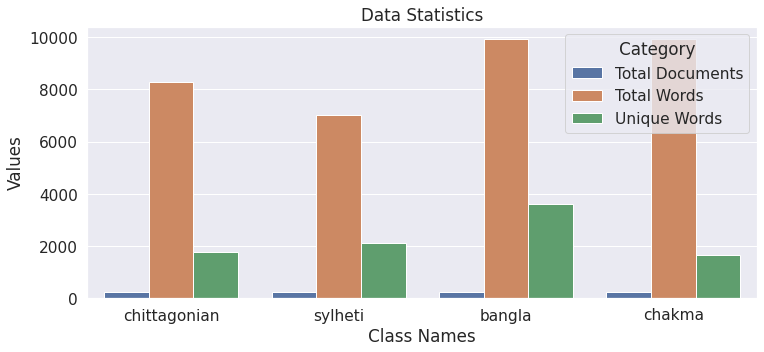

In [61]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 5))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

#Comment Lenght Distribution

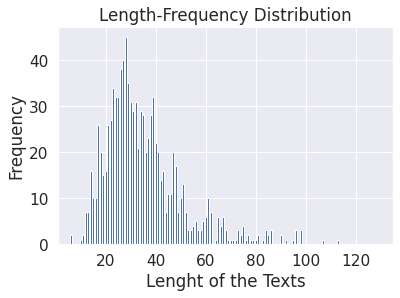

Maximum Length of a Content: 164
Minimum Length of a Content: 6
Average Length of a Content: 35.0


In [62]:
# Calculate the Content of each of the Content
dataset['ContentLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ContentLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Content: {max(dataset.ContentLength)}")
print(f"Minimum Length of a Content: {min(dataset.ContentLength)}")
print(f"Average Length of a Content: {round(np.mean(dataset.ContentLength),0)}")

# Classes for Model Building

In [63]:
# dataset.Tag = dataset.Tag.replace({'Chakma':'Chittagonian','Sylheti':'Bangla'})
chakma = dataset[dataset.Category == 'chakma']
chittagonian = dataset[dataset.Category == 'chittagonian']
sylheti = dataset[dataset.Category == 'sylheti']
bangla = dataset[dataset.Category == 'bangla']
dataset.Category.value_counts()

chittagonian    250
sylheti         250
bangla          250
chakma          250
Name: Category, dtype: int64

##Lable Encoding and Dataset Splitting

In [64]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')
    # print(labels.value_counts())

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.7,
                                                  test_size = 0.3,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [65]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

#**Model Building Using Machine Learning**

##Feature Extraction Using TF-IDF

In [66]:
def calc_gram_tfidf(contents,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        contents: a list of cleaned contents  
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(contents)
    
    return tfidf,X


##Model Training

### For Unigram

In [67]:
ngrams = [(1,1)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Category,False)
    # print(labels)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    

Feature Size :======> 8152

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 700 
	Test			 300


## K-Nearest Neighbor(KNN)

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(X_train,y_train)
knn_train = knn_model.score(X_train,y_train)
print('Training Accuracy:')
print(knn_train)

Training Accuracy:
0.9757142857142858


In [69]:
knn_test = knn_model.score(X_test,y_test)
print('Testing Accuracy:')
print(knn_test)

Testing Accuracy:
0.95


In [70]:
k_pred= knn_model.predict(X_test)

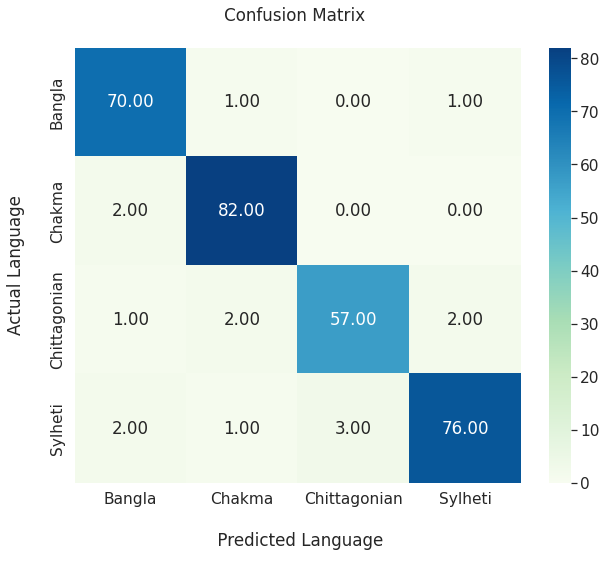

In [71]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,k_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()

In [72]:
print('recall:',recall_score(y_test, k_pred, average='macro'))
print('Precision:',precision_score(y_test, k_pred, average='macro'))
print('F1 score:', f1_score(y_test, k_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, k_pred))

recall: 0.9486492013537646
Precision: 0.9497117554705132
F1 score: 0.9489031107810195
Accuracy: 0.95


## **Logistic Regression**

In [73]:
lr_model= LogisticRegression(random_state=0)  
lr_model.fit(X_train, y_train)  
lr_train = lr_model.score(X_train,y_train)
print('Training Accuracy:',lr_train)

Training Accuracy: 0.9971428571428571


In [74]:
lr_test = lr_model.score(X_test,y_test)
print('Testing Accuracy:', lr_test)

Testing Accuracy: 0.98


In [75]:
lr_pred= lr_model.predict(X_test)

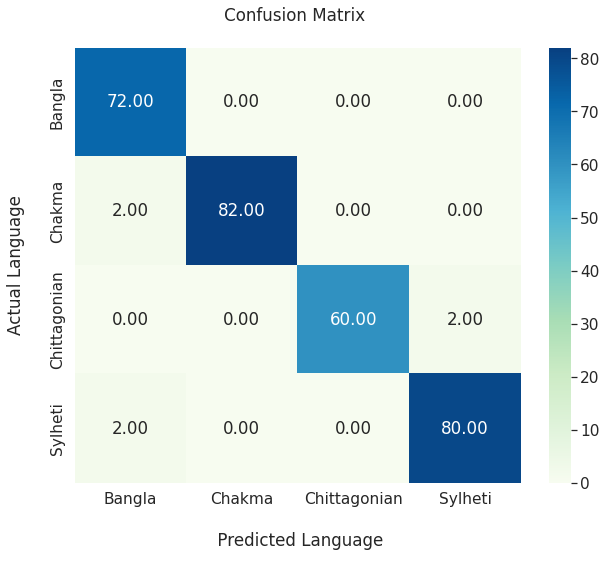

In [76]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()

In [77]:
print('recall:',recall_score(y_test, lr_pred, average='macro'))
print('Precision:',precision_score(y_test, lr_pred, average='macro'))
print('F1 score:', f1_score(y_test, lr_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, lr_pred))

recall: 0.9798855419429771
Precision: 0.9807445442875481
F1 score: 0.9800352734191247
Accuracy: 0.98


### Random Forest

In [78]:
rf_model= RandomForestClassifier(n_estimators = 100)  
rf_model.fit(X_train, y_train)  
rf_train = rf_model.score(X_train,y_train)
print('Training Accuracy:',rf_train)

Training Accuracy: 1.0


In [79]:
rf_test = rf_model.score(X_test,y_test)
print('Testing Accuracy:', rf_test)

Testing Accuracy: 0.96


In [80]:
rf_pred= rf_model.predict(X_test)

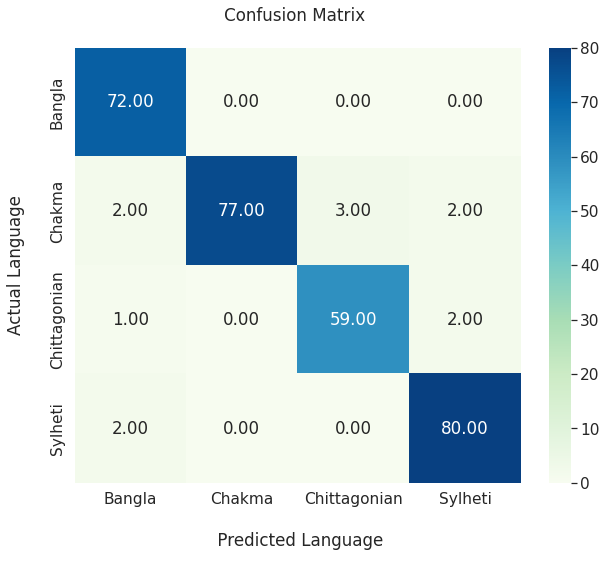

In [81]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()

In [82]:
print('recall:',recall_score(y_test, rf_pred, average='macro'))
print('Precision:',precision_score(y_test, rf_pred, average='macro'))
print('F1 score:', f1_score(y_test, rf_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, rf_pred))

recall: 0.9609723314975085
Precision: 0.9597646976679235
F1 score: 0.9596082542657807
Accuracy: 0.96


### Decision Tree

In [83]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  
dt_train = dt_model.score(X_train,y_train)
print('Training Accuracy:',dt_train)

Training Accuracy: 1.0


In [84]:
dt_test = dt_model.score(X_test,y_test)
print('Testing Accuracy:', dt_test)

Testing Accuracy: 0.84


In [85]:
dt_pred= dt_model.predict(X_test)

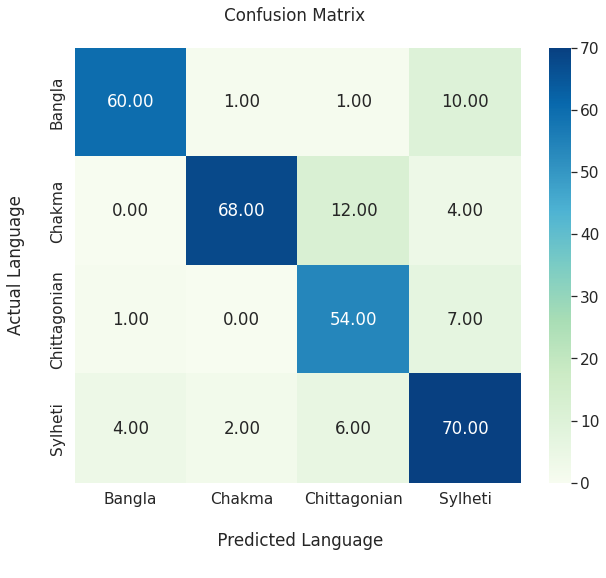

In [86]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()

In [87]:
print('recall:',recall_score(y_test, dt_pred, average='macro'))
print('Precision:',precision_score(y_test, dt_pred, average='macro'))
print('F1 score:', f1_score(y_test, dt_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, dt_pred))

recall: 0.8418708553444981
Precision: 0.8474450496445479
F1 score: 0.8406450796277821
Accuracy: 0.84


### Multinomial Naive Bayes

In [88]:
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train, y_train)  
mnb_train = mnb_model.score(X_train,y_train)
print('Training Accuracy:',mnb_train)

Training Accuracy: 1.0


In [89]:
mnb_test = mnb_model.score(X_test,y_test)
print('Testing Accuracy:', mnb_test)

Testing Accuracy: 0.9766666666666667


In [90]:
mnb_pred= mnb_model.predict(X_test)

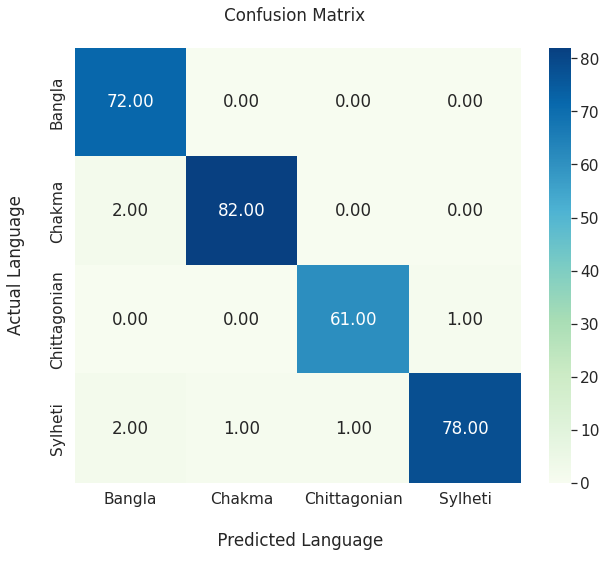

In [91]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()


In [92]:
print('recall:',recall_score(y_test, mnb_pred, average='macro'))
print('Precision:',precision_score(y_test, mnb_pred, average='macro'))
print('F1 score:', f1_score(y_test, mnb_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, mnb_pred))

recall: 0.9778202390318834
Precision: 0.9766332420438453
F1 score: 0.9769559920593758
Accuracy: 0.9766666666666667


### Linear Support Vector Machine

In [93]:
lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
lsvm_model.fit(X_train, y_train)  
lsvm_train = lsvm_model.score(X_train,y_train)
print('Training Accuracy:',lsvm_train)

Training Accuracy: 0.9785714285714285


In [94]:
lsvm_test = lsvm_model.score(X_test,y_test)
print('Testing Accuracy:', lsvm_test)

Testing Accuracy: 0.91


In [95]:
lsvm_pred= lsvm_model.predict(X_test)

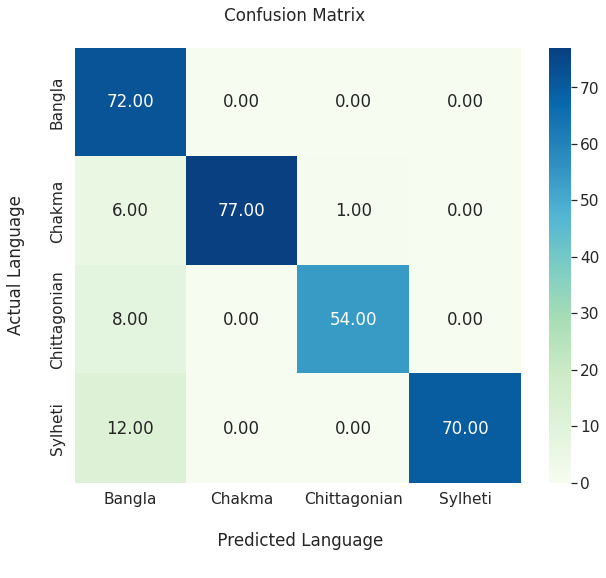

In [96]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lsvm_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()

In [97]:
print('recall:',recall_score(y_test, lsvm_pred, average='macro'))
print('Precision:',precision_score(y_test, lsvm_pred, average='macro'))
print('F1 score:', f1_score(y_test, lsvm_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, lsvm_pred))

recall: 0.9103232362968791
Precision: 0.9291280148423006
F1 score: 0.9119275293289293
Accuracy: 0.91


### RBF Support Vector Machine

In [98]:
ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
ksvm_model.fit(X_train, y_train)  
ksvm_train = ksvm_model.score(X_train,y_train)
print('Training Accuracy:',ksvm_train)

Training Accuracy: 0.9928571428571429


In [99]:
ksvm_test = ksvm_model.score(X_test,y_test)
print('Testing Accuracy:', ksvm_test)

Testing Accuracy: 0.9466666666666667


In [100]:
ksvm_pred= ksvm_model.predict(X_test)

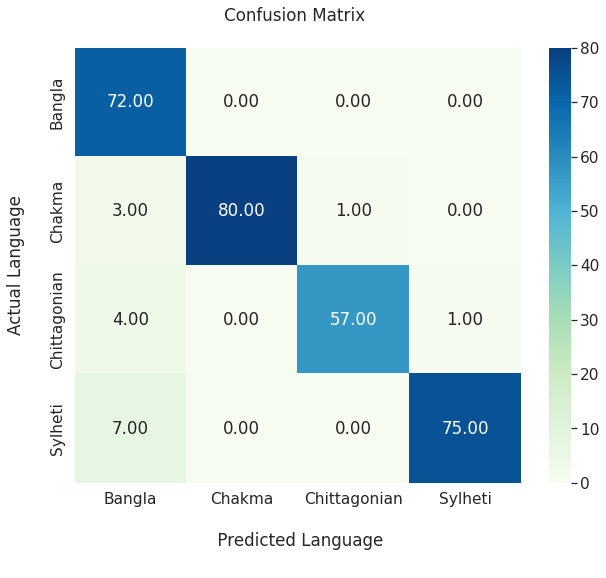

In [101]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,ksvm_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
fx.yaxis.set_ticklabels(['Bangla','Chakma','Chittagonian','Sylheti'])
plt.show()

In [102]:
print('recall:',recall_score(y_test, ksvm_pred, average='macro'))
print('Precision:',precision_score(y_test, ksvm_pred, average='macro'))
print('F1 score:', f1_score(y_test, ksvm_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, ksvm_pred))

recall: 0.9465924843580232
Precision: 0.9517025070695987
F1 score: 0.9465923124421117
Accuracy: 0.9466666666666667


In [103]:
def check(): 
    input_content = input('Enter input message: ')
    # print(Content)
    clean_content = input_content.translate(str.maketrans('', '', string.punctuation))
    transform_text = tfidf.transform([clean_content])
    pred = lr_model.predict(transform_text)

    if(pred[0] == 0):
      print('Bangla Language')
    elif (pred[0] == 1):
      print('Chakma Language')
    elif(pred[0] == 2):
      print('Chittagonian Language')
    else:
      print('Sylheti Language')


In [104]:
check()

Enter input message: আউসে মাইরে দিছলায় লাই খেলার মোটা ফুসকুনি। তাইন আরও দূর গিয়া, হফার থাকি ছিঁইড়া আনতা মুরগাঝুঁট ফুল। তানরে দিসলায় ঝন ঝন ঝন কইরা বাজে এমন ফিতলর হান্ডি বাসন। তাইন ফিতলর প্রেমে ফড়ি আইচ্ছা করি বাজাইলা সংসার। দিলা ছয় সাতটা গানর পদায়শ।
Sylheti Language
